2023WS_41114

<h1><strong>Assignement 4</strong></h1>

<h3>Goal</h3>
In this assignment we learn about the Yang equation[1], which is an alternative to the Lennad-Jones equation[2] to determine the nonbound energy between two atoms. We read in a given datasheet and use its data to determine the energy between two atoms according to both formulas.
After that we plot our results in graph and save them to a csv file.

<h3>Task 1</h3>

<p>In this Task we extract data from the given file CybulskiT1999_Ar2.csv. <br>
We safe this data into a pandas dataframe and normalize it by removing duplicate and missing data entries. <br>
Finally we convert the potential energy V(r) from the given unit Hartree to the International unit of Energy kJ/mol.
</p>


<h4>Libraries</h4>
<p>For this we first have to import the required python libraries:</p>

In [1]:
import math #[3]
import pandas as pd #[4] 

<h4>Data import and normalization</h4>
<p>Now we can import the data from CybulskiT1999_Ar2.csv[5] and safe it to a pandas dataframe labelled raw_dataframe:</p>

In [2]:
#import CybulskiT1999_Ar2.csv
raw_dataframe = pd.read_csv("CybulskiT1999_Ar2.csv",delimiter=";")
raw_dataframe

,R (Å),V(r) (Hartree)
0,3.000,0.003055
1,3.250,0.000518
2,3.500,-0.000279
3,3.500,-0.000279
4,3.600,NaN
5,3.750,-0.000441
6,3.775,-0.000442
7,3.800,-0.000441
8,3.850,-0.000436
9,3.950,NaN


<p>As can be seen in the output above the data still contains duplicate entries and entries with missing data. <br>
We remove these entries with pandas builtin functions drop_duplicates() and dropna() and save the resulting dataframe to normalized_dataframe.</p>

In [3]:
#remove duplicate values
normalized_dataframe = raw_dataframe.drop_duplicates(ignore_index=True) 
#remove empty values
normalized_dataframe = normalized_dataframe.dropna(ignore_index=True) 

normalized_dataframe

,R (Å),V(r) (Hartree)
0,3.000,0.003055
1,3.250,0.000518
2,3.500,-0.000279
3,3.750,-0.000441
4,3.775,-0.000442
5,3.800,-0.000441
6,3.850,-0.000436
7,4.000,-0.000400
8,4.250,-0.000313
9,4.500,-0.000232


<p>Now we have a normalized dataframe, we need to convert the provided unit for the potential energy which is Hartree to the International Unit for Energy whis is kJ/mol.<br>
The conversion formula[6] is as follows:</p>
$$ 1 \frac{kJ}{mol}=1Hartree*2625.5$$
<br>
We add another column to our dataframe which holds the converted Value. We label it "V(r) (kJ/mol)" and save it to an new dataframe labelled kJ_dataframe.

In [4]:
#Convert Hartree to kJ/mol
kJ_dataframe=normalized_dataframe
kJ_dataframe["V(r) (kJ/mol)"]=kJ_dataframe["V(r) (Hartree)"].multiply(2625.5)

kJ_dataframe

,R (Å),V(r) (Hartree),V(r) (kJ/mol)
0,3.000,0.003055,8.020850
1,3.250,0.000518,1.360298
2,3.500,-0.000279,-0.732462
3,3.750,-0.000441,-1.157373
4,3.775,-0.000442,-1.160130
5,3.800,-0.000441,-1.158686
6,3.850,-0.000436,-1.145269
7,4.000,-0.000400,-1.049150
8,4.250,-0.000313,-0.822097
9,4.500,-0.000232,-0.609904


<h3>Task 2</h3>
<p>In task 2 we implement the Lennard-Jones equation and the Yang equation and compute our dataframe with both formulas.</p>


<h4>Lennard-Jones Equation</h4>
<p>The Lennard-Jones equation is four first equation. It is used to calculate the nonbound potentail energy between two atoms. <br>
It is defined as follows:

</p>
$$\mathrm{V}_{LJ}^{}(r)=4\varepsilon\left[ \left( \frac{\sigma}{r} \right)^{12} - [ \left( \frac{\sigma}{r} \right)^{6} \right]$$

In [12]:
def lennardJonesEquation(distance,sigma,episilon) -> float:
    """This function calcuates the potential energy between two atoms in electronvolt
        unsing the Lennard-Jones Equation.
    :param distance: float, distance between the two atoms in Å (Arngstrom)
    :param sigma: float, distance at which point the intermolecular potential between the two atoms is zero Å
    :param episilon: float, the well depth between two atoms and a measure how strongly they attract each other in eV (electronvolt)
   
    :return: float, the potential energy between the two atoms in eV (electronvolt)
    """
    #Typechecks
    if not isinstance(distance, float):
        raise TypeError('You did not specify a floatvalue for the distance')
    if not isinstance(sigma, float):
        raise TypeError('You did not specify a floatvalue for sigma')
    if not isinstance(epsilon, float):
        raise TypeError('You did not specify a floatvalue for epsilon')
                        
    result = 4 * epsilon * ((sigma/distance) ** 12 - (sigma/distance) ** 6)
    return result

<h4>Yang Equation</h4>
<p>The Yang equation also calculates the nonbound potential energy between two atoms. It was discovered in 2020 and is more complex than the Lennard-Jones eqauation but promises to be more robust and more accurate.
<br> It is defined as follows:</p>
$$\mathrm{V}_{Exp}^{}(r)=\varepsilon\left[ e^{\alpha(1-\frac{r}{\sigma})} -\left( \left(  \frac{r}{\sigma}\right)^{4} -2 \left( \frac{r}{\sigma}\right)^{2}+3\right)e^{ \left( \frac{\alpha}{2} \right)\left( 1-\frac{r}{\sigma} \right) } \right]$$

In [6]:
def potential_energy_Yang(epsilon,sigma, radius, alpha) -> float:
    """This function calcuates the potential energy between two atoms in electronvolt
        unsing the Yang Equation.
    :param radius: float, distance between the two atoms in Å (Arngstrom)
    :param sigma: float, distance at which point the intermolecular potential between the two atoms is zero Å
    :param episilon: float, the well depth between two atoms and a measure how strongly they attract each other eV (electronvolt)
    :param alpha: float,  weighing factor to control to control the influence of exponential terms  
   
    :return: float, the potential energy between the two atoms in eV (electronvolt)
    """
    #Typechecks
    if not isinstance(epsilon, float):
        raise TypeError('You must provide epsilon as a float value')
    elif not isinstance(sigma, float):
        raise TypeError('You must provide sigma as a float value')
    elif not isinstance(radius, float):
        raise TypeError('You must provide radius as a float value')
    elif not isinstance(alpha, float):
        raise TypeError('You must provide alpha as a float value')
  
    innerequation = ((radius/sigma)**4 - 2 * (radius/sigma)**2 +3)    
    result = epsilon*(math.exp(alpha * ( 1- (radius/sigma))) - innerequation * math.exp((alpha/2)*(1-(radius/sigma))))
    
    return result

<p>Now we have python functions for both formulas.</p>

<h4>Project specific constants</h4>
<p>To compute both the LennardJones and the Yang functions we need values for σ,α and ε. These values were provided in the assignment sheet and we define the following constatns: </p>

$$α=13.18$$
$$σ=3.75Å$$
$$ε=1.178eV$$


In [7]:
alpha = 13.18
sigma = 3.75 # Å (Arngstrom)
epsilon = 1.178 # eV (electronvolt)

<h4>Computing the values</h4>
<p>After defining those constants we can compute the values in our dataframe with both the Yang and the LennardJones function. <br>
We add the results into a new column in our dataframe labelled LennardJones and Yang for their respective functions:</p>

In [8]:
#generate the according energyvalues values
kJ_dataframe['LennardJones'] = kJ_dataframe['R (Å)'].apply(lambda radius: lennardJonesEquation(radius,sigma,epsilon))
kJ_dataframe['Yang'] = kJ_dataframe['R (Å)'].apply(lambda radius: potential_energy_Yang(epsilon,sigma,radius,alpha))
kJ_dataframe

,R (Å),V(r) (Hartree),V(r) (kJ/mol),LennardJones,Yang
0,3.000,0.003055,8.020850,50.593771,7.069414
1,3.250,0.000518,1.360298,15.121296,0.980612
2,3.500,-0.000279,-0.732462,3.655327,-0.849850
3,3.750,-0.000441,-1.157373,0.000000,-1.178000
4,3.775,-0.000442,-1.160130,-0.176962,-1.176025
5,3.800,-0.000441,-1.158686,-0.332475,-1.170442
6,3.850,-0.000436,-1.145269,-0.587738,-1.150291
7,4.000,-0.000400,-1.049150,-1.027134,-1.043507
8,4.250,-0.000313,-0.822097,-1.174281,-0.814908
9,4.500,-0.000232,-0.609904,-1.049557,-0.607275


<h3>Task 3</h3>
<p>In task 3 we plot the resulting dataframe we got in task 2, to see how both formulas approximate the real values and which one is more precise.</p>

<p>For this we use pandas builtin plot function. 
<br> First we create a new dataframe "plot_dataframe", which is the same as "kJ_dataframe" from task 2 only that we drop the column with the potential energyvalues in Hartee because we don't need them.</p>

In [9]:
plot_dataframe = kJ_dataframe.drop(columns=["V(r) (Hartree)"])

<p>Now all we have to do is use pandas plot funciton and labelling our axies which gives us the plot. 
</p>

<Axes: title={'center': 'Lennard Jones and Yang formula apporximation of potential energies'}, xlabel='Radius in Å', ylabel='Energy in kJ/mol'>

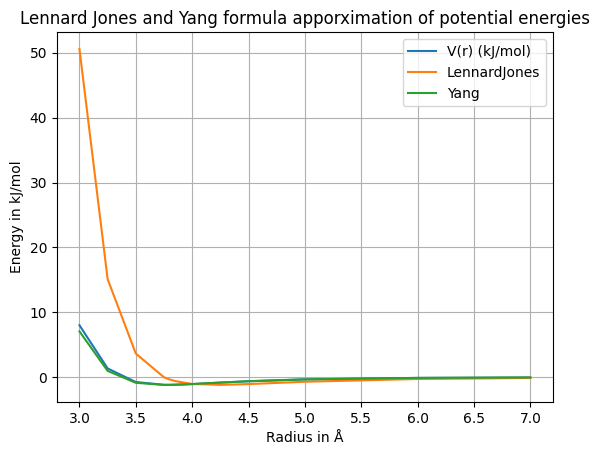

In [10]:
plot_dataframe.plot.line(title="Lennard Jones and Yang formula apporximation of potential energies",
                         x="R (Å)", xlabel="Radius in Å", ylabel="Energy in kJ/mol", grid=True)

<h3>Task 4</h3>
<p>Task 4 is to export our data to a csv file. </p>

<p>For this we use pandas builtin function to_csv and save out data to "assignment4.csv"</p>

In [11]:
kJ_dataframe.to_csv("assignment4.csv", sep=";")

<h3>Conclusion</h3>
<p>In this assigment we learned to use the pandas module for python. We learned how to import and export data from csv files and how to add, remove and manipulate columns in dataframes.</p>

<p> The result of our computing of the data is that both the LennardJones and Yangs equation are good approximations for the potential energy between tow atoms. But Yangs equation is more accurate than LennardJones when it comes to smaller radii, which is why i would personally recommend using it when it comes to precision</p>

<h3>References</h3>
<ol>
<li>Li Yang, Lei Sun, Wei-Qiao Deng "van der Waals Function for Molecular Mechanics". Published January 21, 2020 <br>https://lea.hochschule-bonn-rhein-sieg.de/ilias.php?ref_id=1485372&file=YangSD2020.pdf&ass_id=42489&cmd=downloadFile&cmdClass=ilexsubmissiongui&cmdNode=bk:nw:c0&baseClass=ilExerciseHandlerGUI <br>Accessed Nov 24, 2023 </li>
<li>Rabia Naeem "Lennard-Jones Potential". https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Physical_Properties_of_Matter/Atomic_and_Molecular_Properties/Intermolecular_Forces/Specific_Interactions/Lennard-Jones_Potential#title<br> Accessed Nov 24, 2023</li>
<li>Python Software Foundation "math — Mathematical functions". Last updated on Nov 23, 2023 <br>https://docs.python.org/3/library/math.html <br>Accessed Nov 24, 2023 </li>
<li>pandas "pandas documentation". Last updated on Nov 10, 2023<br> https://pandas.pydata.org/docs/ <br>Accessed Nov 24, 2023</li>
<li> Karl N. Kirschner "Scientific Programming with Python Assignment: The Interaction Between Two Atoms". Last updated on Nov 13, 2023 <br>https://lea.hochschule-bonn-rhein-sieg.de/ilias.php?ref_id=1485372&file=CybulskiT1999_Ar2.csv&ass_id=42489&cmd=downloadFile&cmdClass=ilexsubmissiongui&cmdNode=bk:nw:c0&baseClass=ilExerciseHandlerGUI <br>Accessed Nov 24, 2023</li>
<li>National Institute of Standards and Technology "What's a hartree?". Published 2013 <br>https://cccbdb.nist.gov/hartree.asp#:~:text=A%20hartree%20is%20equal%20to,%2C%20and%20219474.6%20cm%2D1.<br> Accessed  Nov 24, 2023</li>

    
</ol>             